<a href="https://colab.research.google.com/github/TheHexa1/Kaggle/blob/master/Kaggle_housing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
!pip install rfpimp

  Created wheel for rfpimp: filename=rfpimp-1.3.4-cp36-none-any.whl size=10087 sha256=03ced3ccfe19e1e434f97e820c9716a09af27c794ccdb572fce8ce8337df56ce
  Stored in directory: /root/.cache/pip/wheels/c7/35/67/4065afd69df4c0be693ecdec8a9c1433a23f80ee60395272ba
Successfully built rfpimp


In [0]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor


In [6]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [22]:
# cor_matrix = df_train.corr().iloc[:, -1]

# new_ = cor_matrix[cor_matrix > 0.5]

# features = new_.index
# # features

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [27]:
# ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr',
#             'TotRmsAbvGrd', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath',
#             'KitchenAbvGr', 'Fireplaces', 'PoolArea', 'SalePrice']

X = df_train.drop(columns=['Id','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'])
# y = df_train['SalePrice']

print(X.shape)

(1460, 75)


In [0]:
# sample_test = df_test[[x for x in features if x is not 'SalePrice']]
# sample_test

In [0]:
X.info()

In [0]:
# df_train.drop(columns=['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True)
# df_test.drop(columns=['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True)

In [0]:
# X.dropna(inplace=True)
# df_test.dropna(inplace=True)

In [0]:
# X.info()


In [0]:
from sklearn.model_selection import train_test_split

# to attenuate the effect of outliers
y = np.log(X['SalePrice'])
X_new = X.drop(columns=['SalePrice'])

In [0]:
# one hot encoding categorical columns
X_encoded = pd.get_dummies(X_new)

# impute values
X_imputed = X_encoded.interpolate(method='linear')

# X_imputed.isnull().any()
# X_new.interpolate(method='linear')


In [110]:
X_imputed.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, random_state=33, test_size=0.2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


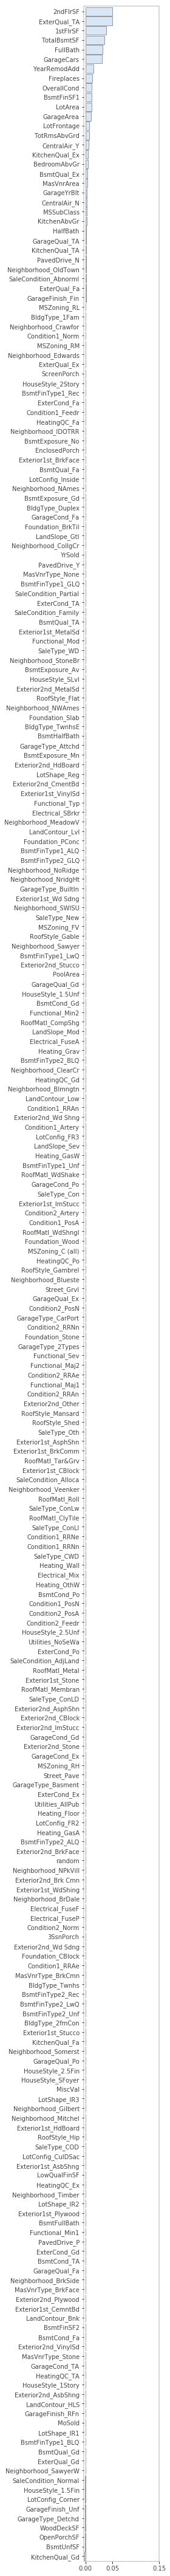

In [69]:
# Random forest permutation Importance for feature selection
from rfpimp import *
# from rfpimp import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# df = pd.read_csv("/Users/parrt/github/random-forest-importances/notebooks/data/rent.csv")

# attentuate affect of outliers in price
# df['price'] = np.log(df['price'])

# df_train, df_test = train_test_split(df, test_size=0.20)

# features = ['bathrooms','bedrooms','longitude','latitude',
#             'price']
# df_train = df_train[features]
# df_test = df_test[features]

# X_train, y_train = df_train.drop('price',axis=1), df_train['price']
# X_test, y_test = df_test.drop('price',axis=1), df_test['price']
X_train['random'] = np.random.random(size=len(X_train))
X_test['random'] = np.random.random(size=len(X_test))

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

imp = importances(rf, X_test, y_test) # permutation
viz = plot_importances(imp)
viz.view()

In [107]:
imp[:10].index

Index(['2ndFlrSF', 'ExterQual_TA', '1stFlrSF', 'TotalBsmtSF', 'FullBath',
       'GarageCars', 'YearRemodAdd', 'Fireplaces', 'OverallCond',
       'BsmtFinSF1'],
      dtype='object', name='Feature')

In [0]:
features = ['OverallQual', 'GrLivArea', 'YearBuilt', '2ndFlrSF', 'ExterQual_TA', '1stFlrSF', 'TotalBsmtSF', 'FullBath',
       'GarageCars', 'YearRemodAdd', 'Fireplaces', 'OverallCond', 'BsmtFinSF1']
X_train = X_train[features]
X_test = X_test[features]

In [113]:
from sklearn.preprocessing import MinMaxScaler
# n_train = int(0.8*X.shape[0])
# train, test = X.iloc[:n_train, :], X.iloc[n_train:, :]

# print(test.columns)

scaler = MinMaxScaler(feature_range=(-1,1))
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# sample_test_scaled = scaler.transform(sample_test)

X_train_scaled.head()
# train_scaled.head()

,OverallQual,GrLivArea,YearBuilt,2ndFlrSF,ExterQual_TA,1stFlrSF,TotalBsmtSF,FullBath,GarageCars,YearRemodAdd,Fireplaces,OverallCond,BsmtFinSF1
0,-0.333333,-0.722708,0.173913,-1.000000,-1.0,-0.583967,-0.416095,-0.333333,0.0,-0.900000,-1.000000,-0.25,-1.000000
1,0.111111,-0.681253,0.536232,-1.000000,1.0,-0.521769,-0.413600,-0.333333,0.0,-0.066667,-1.000000,0.25,-0.553097
2,0.111111,-0.299401,0.507246,-0.262954,-1.0,-0.474775,-0.670618,0.333333,0.0,0.466667,-0.333333,0.50,-1.000000
3,-0.111111,-0.334408,0.202899,-1.000000,1.0,-0.001382,0.099813,-0.333333,0.0,-0.200000,-0.333333,-0.25,-0.729204
4,-0.333333,-0.863657,0.420290,-1.000000,1.0,-0.795439,-0.606987,-0.333333,-1.0,-0.333333,-1.000000,0.25,-0.884071


In [0]:
# y_train.head()

In [0]:
# from sklearn.preprocessing import OneHotEncoder

# enc = OneHotEncoder(handle_unknown='ignore')

# encoded_ = enc.fit(X_train_scaled)
# encoded_df_train = encoded_.transform(X_train_scaled)
# encoded_df_test = encoded_.transform(X_test_scaled)

# print(encoded_df_train.shape)
# print(encoded_df_test.shape)

In [140]:
# encoded_df_train

<1168x2064 sparse matrix of type '<class 'numpy.float64'>'
	with 15184 stored elements in Compressed Sparse Row format>

In [128]:
from sklearn import svm

# svm_rg = svm.LinearSVR()
svm_rg = svm.SVR(kernel='rbf')

preds = svm_rg.fit(X_train_scaled, y_train).predict(X_test_scaled)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [124]:
xgb_rg = XGBRegressor(n_estimators=200)

preds = xgb_rg.fit(X_train_scaled, y_train).predict(X_test_scaled)

[19:11:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [0]:
# from keras.models import Sequential
# from keras.layers import Dense, Activation, Dropout

# # model = Sequential()
# model = Sequential() # The Keras Sequential model is a linear stack of layers.
# model.add(Dense(100, input_dim=X_train_scaled.shape[1])) # Dense layer
# model.add(Activation('tanh')) # Activation layer
# # model.add(Dropout(0.5)) # Dropout layer
# model.add(Dense(100)) # Another dense layer
# model.add(Activation('tanh')) # Another activation layer
# # model.add(Dropout(0.5)) # Another dropout layer
# model.add(Dense(1)) # Last dense layer

# model.compile(optimizer='adam', loss='mae')

# history = model.fit(X_train_scaled, y_train, epochs=1000, batch_size=128, validation_split=0.1)

In [0]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

preds = mnb.fit(X_train_scaled, y_train).predict(X_test_scaled)

In [132]:
print(preds[:5])
print(y_test[:5])

[140000 140000 140000 140000 140000]
753     275500
445     127500
1149    143000
1300    225000
1369    232000
Name: SalePrice, dtype: int64


In [0]:
# preds = np.array(preds).reshape(-1,1)
# print(preds.shape, X_test.values.shape)
# inv_yhat = np.concatenate((preds, X_test.values[:,1:]), axis=1)
# # print(inv_yhat[:5,:])
# inv_yhat = scaler.inverse_transform(inv_yhat)[:, 0]
# # print(inv_yhat[:,0])
# # print(y_test.values.shape)
# inv_y = np.concatenate((y_test.values.reshape(-1,1), X_test.values[:,1:]), axis=1)
# # print(inv_y[:5,:])
# inv_y = scaler.inverse_transform(inv_y)[:, 0]
# # print(inv_y[:,0])
# # print(y_test[:5])

In [129]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print(mean_absolute_error(np.exp(y_test), np.exp(preds)))
print(np.sqrt(mean_squared_error(np.exp(y_test), np.exp(preds))))

15984.366440428348
22086.755403128016


In [0]:
#
# svm-rbf - 15984
# xgb-100 - 16179

In [130]:
# print(pd.DataFrame(y_test, columns=['val']).head(20))
# print(pd.DataFrame(preds, columns=['val']).head(20))
print(np.exp(y_test[:5]))
np.exp(preds[:5])

753     275500.0
445     127500.0
1149    143000.0
1300    225000.0
1369    232000.0
Name: SalePrice, dtype: float64


array([266876.70000082, 165117.40707039, 158393.69130564, 228836.64630127,
       250572.24366692])